Name: Aryan Jha

Program: MBA TECH AI

Cousre: Machine Learning

Topic: KNN using Sklearn library


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

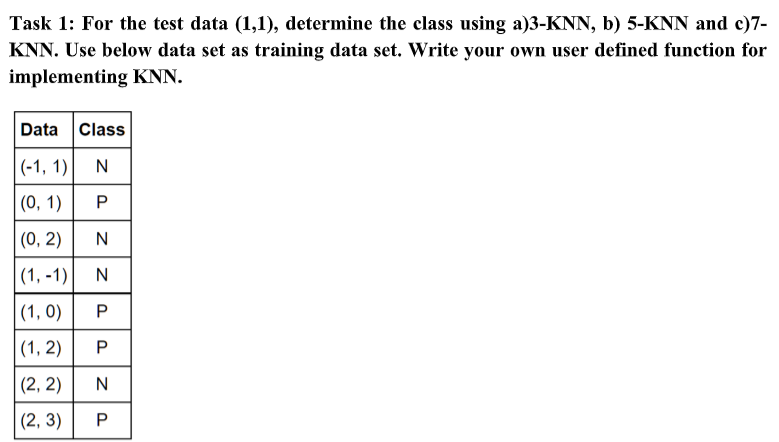

In [ ]:
x1=[-1, 0, 0, 1, 1, 1, 2, 2]
y1=[1, 1, 2, -1, 0, 2, 2, 3]
z=['N', 'P', 'N', 'N', 'P', 'P', 'N', 'P']
dist=[]
def implement_KNN(test_x, test_y):

  for i,j in zip(x1, y1):
      a= (test_x-i)**2
      b= (test_y-j)**2
      distance= math.sqrt(a+b)
      dist.append(distance)
  return (dist)


In [ ]:
p=int(input("Enter test value x: "))
q=int(input("Enter test value y: "))
implement_KNN(p,q)

Enter test value x: 3
Enter test value y: -1


[4.47213595499958,
 3.605551275463989,
 4.242640687119285,
 2.0,
 2.23606797749979,
 3.605551275463989,
 3.1622776601683795,
 4.123105625617661]

In [ ]:
import pandas as pd

df = pd.DataFrame(list(zip(x1, y1, z, dist)),
               columns =['X', 'Y', 'Class', 'Distance'])
print (df)

   X  Y Class  Distance
0 -1  1     N  4.472136
1  0  1     P  3.605551
2  0  2     N  4.242641
3  1 -1     N  2.000000
4  1  0     P  2.236068
5  1  2     P  3.605551
6  2  2     N  3.162278
7  2  3     P  4.123106


In [ ]:
k= int(input("Enter the value of K: "))

Enter the value of K: 3


In [ ]:
df=df.sort_values("Distance")

In [ ]:
df2= df.reset_index(drop= True)

In [ ]:
df3=df2.head(k)

In [ ]:
print(df3)

   X  Y Class  Distance
0  1 -1     N  2.000000
1  1  0     P  2.236068
2  2  2     N  3.162278


In [ ]:
test_class= df3["Class"].mode().value_counts().nlargest

In [ ]:
print(test_class)

<bound method Series.nlargest of N    1
Name: Class, dtype: int64>


USING SKLEARN FUNCTION


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X=[[-1,1],[0,1],[0,2],[1,-1],[1,0],[1,2],[2,2],[2,3]]
X=np.array(X)
y=['N','P','N','N','P','P','N','P']
y=np.array(y)

In [ ]:
print(X)

[[-1  1]
 [ 0  1]
 [ 0  2]
 [ 1 -1]
 [ 1  0]
 [ 1  2]
 [ 2  2]
 [ 2  3]]


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.predict([[1,1]])

array(['P'], dtype='<U1')

KNN ON A DATA SET USING SKLEARN FUNCTION


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
dataf= pd.read_csv("Social_Network_Ads.csv")

In [ ]:
dataf.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
dataf.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataf.size

2000

In [ ]:
dataf.shape

(400, 5)

To label encode gender

In [ ]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()

In [ ]:
x=[]
x=list(dataf['Gender'].unique())
print(x)

['Male', 'Female']


In [ ]:
le.fit(x)

LabelEncoder()

Replacing original values with encoded values in the dataframe

In [ ]:
dataf['Gender']=le.transform(dataf.Gender)

In [ ]:
le.transform(['Male','Female'])

array([1, 0])

In [ ]:
print(dataf)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


Selecting Input

In [ ]:
Input=dataf.drop(['User ID','Purchased'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



Initializing minmax normalization

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X=Input['EstimatedSalary']
X=np.array(X)
X=X.reshape(-1,1)

In [ ]:
scaler.fit(X)

MinMaxScaler()

Replacing original values with normalized values

In [ ]:
Input['EstimatedSalary']=scaler.transform(X)

In [ ]:
print(Input)

     Gender  Age  EstimatedSalary
0         1   19         0.029630
1         1   35         0.037037
2         0   26         0.207407
3         0   27         0.311111
4         1   19         0.451852
..      ...  ...              ...
395       0   46         0.192593
396       1   51         0.059259
397       0   50         0.037037
398       1   36         0.133333
399       0   49         0.155556

[400 rows x 3 columns]


In [ ]:
Y=Input['Age']
Y=np.array(Y)
Y=Y.reshape(-1,1)

In [ ]:
scaler.fit(Y)

MinMaxScaler()

In [ ]:
Input['Age']=scaler.transform(Y)

In [ ]:
print(Input)

     Gender       Age  EstimatedSalary
0         1  0.023810         0.029630
1         1  0.404762         0.037037
2         0  0.190476         0.207407
3         0  0.214286         0.311111
4         1  0.023810         0.451852
..      ...       ...              ...
395       0  0.666667         0.192593
396       1  0.785714         0.059259
397       0  0.761905         0.037037
398       1  0.428571         0.133333
399       0  0.738095         0.155556

[400 rows x 3 columns]


In [ ]:
Output=dataf['Purchased']

Initializing train test split

Split chosen is 80-20

In [ ]:
Input_train, Input_test, Output_train, Output_test = train_test_split(
                      Input,Output, test_size=0.2, random_state=42)

In [ ]:
neighbours = KNeighborsClassifier(n_neighbors=10)


In [ ]:
neighbours.fit(Input_train, Output_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predicted=neighbours.predict(Input_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Output_test, predicted)

array([[49,  3],
       [ 2, 26]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['class 0', 'class 1']

In [ ]:
print(classification_report(Output_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.94      0.95        52
     class 1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

